# This is a homework 1 for CSC588 Learning Theory course
# Done by Ivan Akinfiev 

## Problem 1. (a) 

First of all, let's specify the range of X, since the table will depend on it. From (c) we can assume that this is ${0,1,2,3}$

Having in mind basic probability, we will use $Bin(x,n,p)$ which equals, 

$$ f_{B}(x,n,p) = \frac{n!}{(n-x)!x!}p^x(1-p)^{n-x}$$

Now, we will complete the table using $\mathbb{P}(X,Y) = \mathbb{P}(X|Y)\mathbb{P}(Y)$ Considering that $\mathbb{P}(Y=1)=\mathbb{P}(Y=-1) = \frac{1}{2}$ we will just divide every output from $f_{B}(x,n,p)$ by $2$

Then, let's fill the table when $Y=+1$ and, therefore, $f_{B}(x=x,n=3,p=2/3)$
\
$\mathbb{P}(X=0,Y=-1)=1 \cdot (1-2/3)^3 = (1/3)^3/2 = 1/27/2 = 1/54$
$\mathbb{P}(X=1,Y=-1)=3 \cdot (2/3)^1(1-2/3)^2 / 2 = 2/9 /2 = 1/9 $ 
$\mathbb{P}(X=2,Y=-1)=3 \cdot (2/3)^2(1-2/3)^1 = 4/9/2 = 2/9$
$\mathbb{P}(X=3,Y=-1)=1 \cdot (2/3)^3(1-2/3)^0 = 8/27/2 = 4/27$
\
$f_{B}(x=x,n=2,1/3)$
\
$\mathbb{P}(X=0,Y=+1)=1 \cdot (1-1/3)^3 = (2/3)^2/2 = 4/9/2 = 2/9$
$\mathbb{P}(X=1,Y=+1)=2 \cdot (1/3)^1(2/3)^1 / 2 = 2*2/9/2 = 2/9 $ 
$\mathbb{P}(X=2,Y=+1)=1 \cdot (1/3)^2(1-2/3)^0 = 4/9/2 = 1/9/2 = 1/18$
$\mathbb{P}(X=3,Y=+1)= 0$

Can be easily checked that sum over everything is 1.



## (b)

Using law of alternatives: 

$$ \mathbb{P}(Y=-1|X=1) = \frac{\mathbb{P}(X,Y)}{\mathbb{P}(X)} = \frac{\mathbb{P}(X,Y)}{\sum_{\mathbb{y} \in Y}\mathbb{P}(X=1|Y=y)\mathbb{P}(Y=y)}=$$
 $$= \frac{\mathbb{P}(X,Y)}{\sum_{\mathbb{y} \in Y}\mathbb{P}(X=1,Y=y)} = \boxed{\frac{1/9}{(2/9+1/9)}= \frac{1}{3}}$$

## (c) 

We need to minimize the error under $\mathbb{P}(Y|X)$. If so, all the information is already given in table, except we also need to find where $\mathbb{P}(Y|X)$ is the biggest in every possible X and choose where probability is bigger. 


$$\mathbb{P}(Y=-1|X=0) = \sim 0.07$$
$$\mathbb{P}(Y=-1|X=1) = 1/3$$
$$\mathbb{P}(Y=-1|X=2) = 0.8$$
$$\mathbb{P}(Y=-1|X=3) = 1$$
\
$$\mathbb{P}(Y=+1|X=0) = \sim 0.92$$
$$\mathbb{P}(Y=+1|X=1) = 2/3$$
$$\mathbb{P}(Y=+1|X=2) =0.2$$
$$\mathbb{P}(Y=+1|X=3) = 0$$
\
By calculating that, function should output {1,1,-1,-1} 

The function that estimates that is 

$$ \boxed{f(x)=sign(-(x-2)) ∧ {-1 \  if \ x = 2} $$

The following function will have the following classification error: 

$$ (0.07 + 1/3 + 0.2 + 0)/4 = \sim 0.6/4 = \boxed{\sim 0.15}$$

## Problem 2 (a)

Given set of examples $(x_1,x_2,x_3....x_n) \in \mathbb{R}^d $ and having fact that normal distribution has additivity in its parameters, we have the following. Given,

$$ y_i =  \left< \theta, x_i \right> + \epsilon_i, \epsilon_i ∼ \mathcal{N}(0,\sigma^2)$$
and the fact that if $$ ϵ ∼ \mathcal{N}(0, σ^2), a + ϵ \sim \mathcal{N}(a, σ^2)$$
we have 
$$ y_i \sim \mathcal{N}(\left<\theta, x_i \right >,σ^2) $$
or, in general terms, 
$$ \boxed{y \sim \mathcal{N}(X\theta,\sigma^2I)}$$
where $X = Σ$

We need to note that since all $\epsilon_i$ are independent, the $y=(y_1,y_2,...y_n)$ will have multivariate Gaussian distribution with trivial covariance matrix, i.e. they are uncorrelated.

### (b)

We will stick to the matrix form. Firstly, the $\hat{\theta}$ is stated

$$ \hat{θ} = \left(X^{\top}X \right )^{-1}X^{\top}y$$

Then, we are willing to use the theorem that states that if 

$$ ϵ ∼ \mathcal{N}(μ,Σ)$$
then
$$ A\epsilon + m \sim \mathcal{N}(A\mu + m, AΣA^{\top})$$

Using this theorem, we consider $A$ to be $\left(X^{\top}X \right )^{-1}X^{\top}$

Then, if $y \sim \mathcal{N}(X\theta,\sigma^2I)$
 
$$ \hat{θ} \sim \mathcal{N} \left ( AX\theta, A\sigma^2 I A^{\top} \right ) = \mathcal{N} \left ( \left(X^{\top}X \right )^{-1}X^{\top}X\theta,\left(X^{\top}X \right )^{-1}X^{\top}\sigma^2I \left(X^{\top}X \right )^{-1}X^{\top} \right )=$$
$$\boxed{\mathcal{N} \left ( \theta,\sigma^2 \left(X^{\top}X \right )^{-1}\right )} $$


### (c)


Considering the vector on the right side of bracket $\left<v,\hat{θ} - θ \right > $, using the arguments above, it would be still be gaussian with shifted mean by $\theta$. Now, note that dot product squeezes two vectors into a number, so the output should be One-Dimension Gaussian distribution. 

From question 2, 

$$ \mu = \left(X^{\top}X \right )^{-1}X^{\top}X\theta $$

Then the distribution equals 

$$\left<v,\hat{θ} - θ \right > \sim \mathcal{N}\left (v \cdot (\mu - \theta),v^{\top} \sigma^2 \left(X^{\top}X \right )^{-1} v\right )$$
But, the $\mu = \theta$. Then, 

$$\mathcal{N}\left (v \cdot 0,v^{\top} \sigma^2 \left(X^{\top}X \right )^{-1} v \right ) = $$

$$\mathcal{N}\left (0,v^{\top} \sigma^2 \left(X^{\top}X \right )^{-1} v \right )$$

This is one-dimensional normal distribution and $\mathbb{E}[X]=0$ and finite variance $Var[X] = \sigma^2 \left(X^{\top}X \right )^{-1}$ Let's call it $V$

Now, we need to construct a function that 

$$ ∀δ \in (0,1], \mathbb{P}(\left ( \left | \left < v, \hat{\theta} - \theta \right > \right | ⋝ f(δ) \right ) ≤ \delta $$

Let's use Chebyshev inequality, which states that 

$$ \mathbb{P}\left (\left | X-\mu \right | ≤ \sqrt{V}k \right ) ≥ \frac{1}{k^2}$$

We want to find $f(\delta)$ such that 

$$\mathbb{P}\left( \left| \left < v, \hat{\theta} - \theta \right > \right | \geq f(\delta) \right ) \leq \delta )$$

Setting
$$ \frac{1}{k^2} = \delta$$,  we solve for $k$:

$$ k = \frac{1}{\sqrt{\delta}}$$


Then, substituting $\delta$ into $k$ we have, 

$$\mathbb{P} \left ( \left|  \left <v,\hat{θ}-θ \right > \right| ≥ \frac{\sqrt{V}}{\sqrt{δ}} \right ) ≤ \delta  $$

Hence, 

we can define $f$ as this: 

$$ \boxed{f(\delta) = \frac{\sqrt{Var[X]}}{\sqrt{\delta}}} $$  

given that $Var[X]$ is some constant, so $f(δ)$ only depends on $\delta$. Also, $\frac{1}{\sqrt{δ}}$ is a decreasing function as desired. 





## Problem 3 (a)

In [1]:
import random as rn
import numpy as np
import pandas as pd 
from typing import List
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [268]:
def generate_data(n, lam):
    data = pd.DataFrame([], columns=['x_1', 'x_2', 'y'])
    count = 0
    w_star = (1/math.sqrt(2), 1/math.sqrt(2))
    while True:
        if count == n:
            break
        x_1 = np.random.uniform(-1,1)
        x_2 = np.random.uniform(-1,1)
        x_i = np.array([x_1,x_2])
        norm = np.linalg.norm(x_i, ord=2)
        if norm <= 1:     
            wx_dot = np.dot(x_i, w_star)
            if np.abs(wx_dot) >= lam:
                data.loc[count] = (x_i[0], x_i[1], np.sign(wx_dot))
                count += 1
        else:
            continue

    return data






In [269]:
sample_1000 = generate_data(1000, 1/32 )
sample_1000


,x_1,x_2,y
0,0.009787,0.485603,1.0
1,-0.344589,-0.444828,-1.0
2,0.448348,0.112515,1.0
3,-0.290947,0.755389,1.0
4,-0.060750,-0.009066,-1.0
...,...,...,...
995,0.761210,0.475867,1.0
996,0.554750,0.661231,1.0
997,-0.422267,-0.622717,-1.0
998,-0.062733,0.006968,-1.0


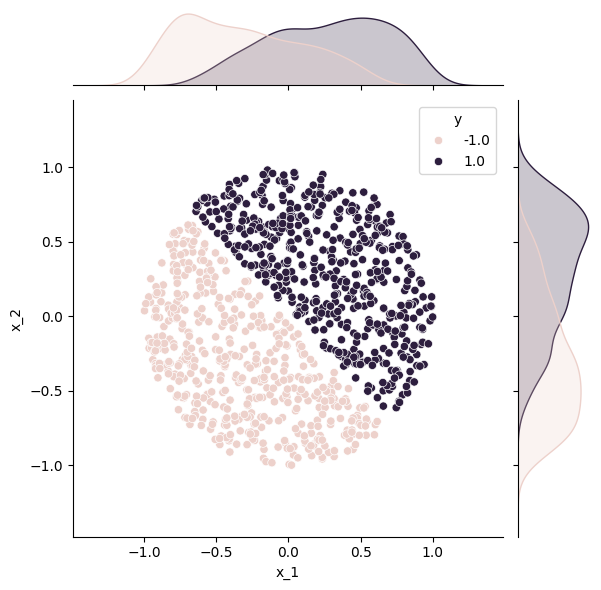

In [270]:
sns.jointplot(data=sample_1000, x='x_1', y='x_2', hue='y')

### (b)

TOTAL M VALUE IS: 12
FINAL WEIGHTS ARE: 1.3796161659813737   1.4919113180729662


12

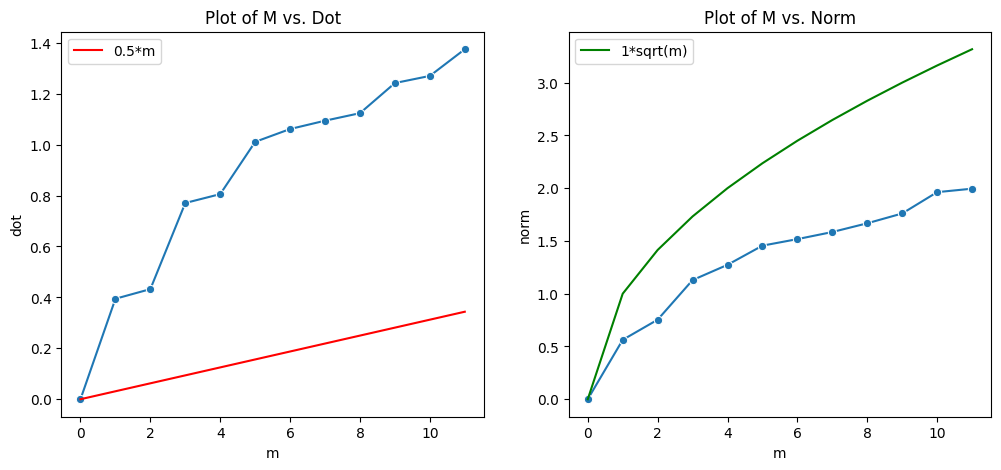

In [271]:
def sim_perceptron(data: pd.DataFrame, lam = 1/32, draw=True, plot=True):
    data_for_plot = pd.DataFrame([], columns=['m', 'dot', 'norm'])
    w_iter = np.array([0,0])
    w_star = np.array([0.5, 0.5])
    M = 0 
    for iteration in range(len(data)):
        y_true = data.iloc[iteration,2]
        y_hat = np.sign(np.dot((data.iloc[iteration,0],data.iloc[iteration,1]), w_iter))
        if y_hat == 0: y_hat = 1
        if y_hat == y_true:
            continue
        else:
            norma = np.linalg.norm(w_iter,2)
            dots = np.dot(w_iter,w_star)
            w_iter = w_iter + np.array([y_true*data.iloc[iteration,0], y_true*data.iloc[iteration,1]])
            data_for_plot.loc[M] = [M, dots, norma]
            M += 1
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        sns.lineplot(ax=axes[0], x='m', y='dot', data=data_for_plot, marker='o')
        axes[0].set_title('Plot of M vs. Dot')
        axes[0].plot(data_for_plot['m'], lam * data_for_plot['m'], label='0.5*m', color='red')
        axes[0].legend()
        sns.lineplot(ax=axes[1], x='m', y='norm', data=data_for_plot, marker='o')
        axes[1].set_title('Plot of M vs. Norm')
        axes[1].plot(data_for_plot['m'], np.sqrt(data_for_plot['m']), label='1*sqrt(m)', color='green')
        axes[1].legend() 
    if draw:
        print("TOTAL M VALUE IS: " + str(M))
        print("FINAL WEIGHTS ARE: " + str(w_iter[0]) + "   " + str(w_iter[1]))
    
    
    return M
            
            
            
            
            

sim_perceptron(sample_1000)

Indeed, as we see, the graphs give us the correct bounds for both dot products and norms.

### (c)

We will plot only $1/\lambda^2$ up untill $\lambda = \frac{1}{2^{-4}}$ in order the plot not explode in the skies, because $1/(1/4098)^2$ already is a very big number

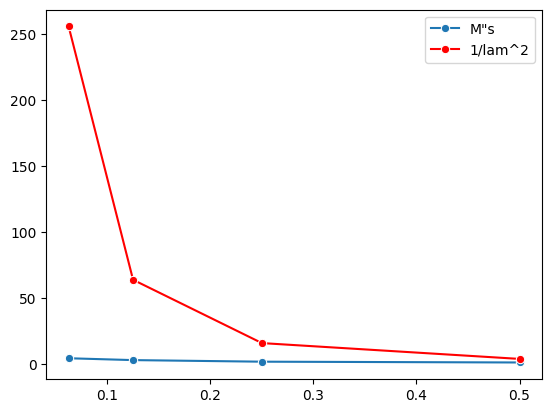

In [277]:
def problem_c():
    lams = [2**(-i) for i in range(1,7)]
    M_i = []
    for i in lams:
        list_of_datasets = [generate_data(n=100,lam=i) for j in range(10)]
        sim_percs = [sim_perceptron(data=ds, draw=False, plot=False) for ds in list_of_datasets]
        M_i.append(np.mean(sim_percs))
    
    lams_squared = []
    for i in lams:
        lams_squared.append(1/(i**2))
    sns.lineplot(x=lams[:-2], y=M_i[:-2], marker='o', label='M"s')
    sns.lineplot(x=lams[:-2], y=lams_squared[:-2], label='1/lam^2', color='red', marker='o')
problem_c() 

It is always far below $1/\lambda^2$ due to the Perceptron Convergence Theorem. 


### Problem 4 

Approximately 12-14 hours, including reading material. 